## Imports

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pylab as plt
plt.rcParams['figure.figsize'] = (14, 6)

import datetime
import numpy as np
import netCDF4

In [2]:
nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_default2_5km_latest.nc")

In [3]:
time_v = nc.variables['time']

# Choose a time-step
t_index = 11
ts = netCDF4.num2date(time_v[t_index], time_v.units)
print(ts)

2017-03-31 17:00:00


## Wind gusts

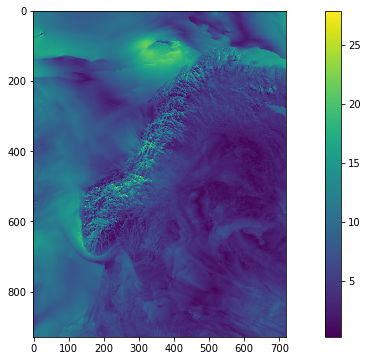

In [4]:
wind_gust_v = nc.variables['wind_speed_of_gust']
plt.imshow(np.flipud(wind_gust_v[t_index, :, :]))
plt.colorbar()

## Wind speed x and y components

In [5]:
wind_x_v = nc.variables['x_wind_10m']
wind_y_v = nc.variables['y_wind_10m']

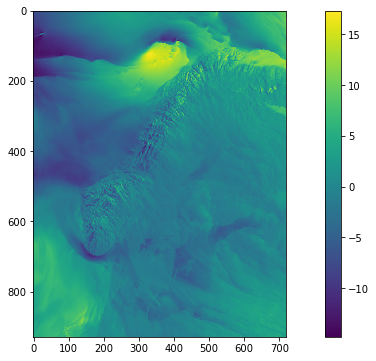

In [6]:
plt.imshow(np.flipud(wind_x_v[t_index, :, :]))
plt.colorbar()

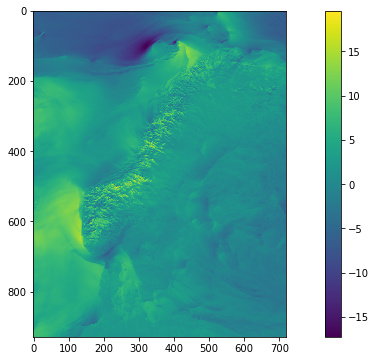

In [7]:
plt.imshow(np.flipud(wind_y_v[t_index, :, :]))
plt.colorbar()

## Wind speed

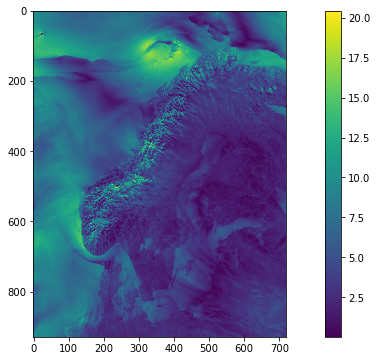

In [8]:
wind_speed = np.sqrt(wind_x_v[t_index, :, :]**2 + wind_y_v[t_index, :, :]**2)
plt.imshow(np.flipud(wind_speed))
plt.colorbar()

## Wind direction

In [9]:
print(ts)

2017-03-31 17:00:00


The calculated vector indicates the direction to where the wind is blowing to, while we want to indicate the direction it is coming from in a wind map.
Therefore we need to __invert__ the *x* and *y* components of the vector before calculating the angle. 

In [13]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_index, :, :], -wind_y_v[t_index, :, :]))

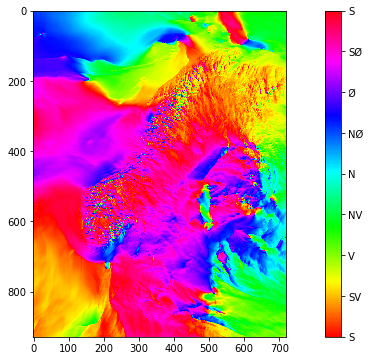

In [11]:
plt.imshow(np.flipud(wind_dir), cmap=plt.cm.hsv, vmin=-180, vmax=180)
cbar = plt.colorbar()
cbar.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])

## Small test

[[-180.         -116.56505118  -90.        ]
 [  45.          113.96248897    5.71059314]
 [  -5.19442891   92.86240523 -135.        ]]


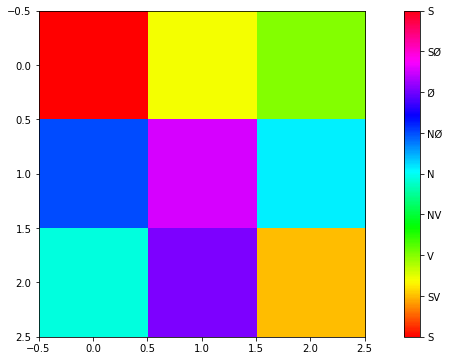

In [12]:
wind_dir = np.degrees(np.arctan2(-np.array([[0, 20, 10], [-5, -18, -1], [1, -20, 3]], dtype="float"), -np.array([[10, 10, 0], [-5, 8, -10], [-11, 1, 3]], dtype="float")))
print(wind_dir)
plt.imshow(wind_dir, cmap=plt.cm.hsv, vmin=-180, vmax=180)
cbar = plt.colorbar()
cbar.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])

## Prepare wind rose

In [14]:
x_range = np.arange(150, 250)
y_range = np.arange(200,300)
t_range = np.arange(6,30)

In [15]:
wind_speed = np.sqrt(wind_x_v[t_range, y_range, x_range]**2 + wind_y_v[t_range, y_range, x_range]**2)

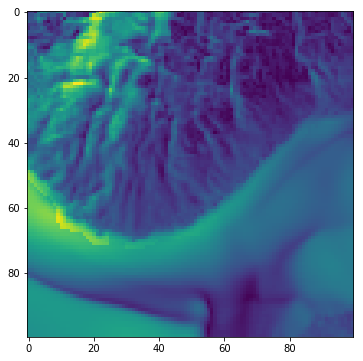

In [16]:
plt.imshow(np.flipud(wind_speed[5,:,:]))

In [17]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_range, y_range, x_range], -wind_y_v[t_range, y_range, x_range]))

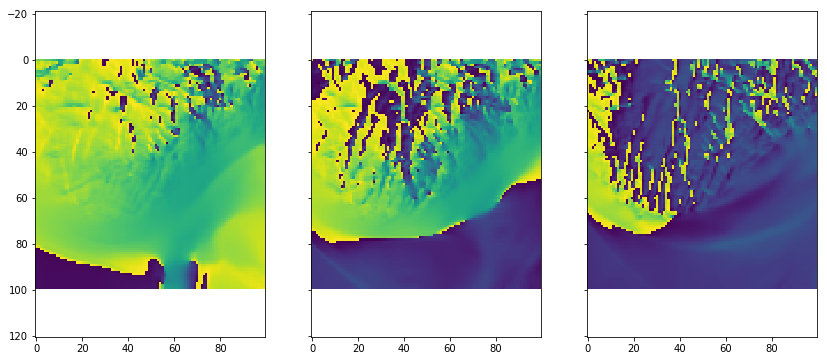

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
ax1.imshow(np.flipud(wind_dir[5,:,:]), vmin=-180, vmax=180)
ax2.imshow(np.flipud(wind_dir[10,:,:]), vmin=-180, vmax=180)
ax3.imshow(np.flipud(wind_dir[15,:,:]), vmin=-180, vmax=180)

In [19]:
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)
len_wind = len(wind_speed_f)

(240000,) (240000,)


In [27]:
N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]

In [29]:
gentle_breeze = 5.5
strong_breeze = 13.8
gale = 20.7
storm = 32.6


N_gentle_breeze = len(N[np.where(N<gentle_breeze)]) / len_wind * 100
N_strong_breeze = len(N[np.where((N>=gentle_breeze) & (N<strong_breeze))]) / len_wind * 100
N_gale = len(N[np.where((N>=strong_breeze) & (N<gale))]) / len_wind * 100
N_storm = len(N[np.where((N>=gale) & (N<storm))]) / len_wind * 100
N_hurricane = len(N[np.where((N>=storm))]) / len_wind * 100

NE_gentle_breeze = len(NE[np.where(NE<gentle_breeze)]) / len_wind * 100
NE_strong_breeze = len(NE[np.where((NE>=gentle_breeze) & (NE<strong_breeze))]) / len_wind * 100
NE_gale = len(NE[np.where((NE>=strong_breeze) & (NE<gale))]) / len_wind * 100
NE_storm = len(NE[np.where((NE>=gale) & (NE<storm))]) / len_wind * 100
NE_hurricane = len(NE[np.where((NE>=storm))]) / len_wind * 100

E_gentle_breeze = len(E[np.where(E<gentle_breeze)]) / len_wind * 100
E_strong_breeze = len(E[np.where((E>=gentle_breeze) & (E<strong_breeze))]) / len_wind * 100
E_gale = len(E[np.where((E>=strong_breeze) & (E<gale))]) / len_wind * 100
E_storm = len(E[np.where((E>=gale) & (E<storm))]) / len_wind * 100
E_hurricane = len(E[np.where((E>=storm))]) / len_wind * 100

SE_gentle_breeze = len(SE[np.where(SE<gentle_breeze)]) / len_wind * 100
SE_strong_breeze = len(SE[np.where((SE>=gentle_breeze) & (SE<strong_breeze))]) / len_wind * 100
SE_gale = len(SE[np.where((SE>=strong_breeze) & (SE<gale))]) / len_wind * 100
SE_storm = len(SE[np.where((SE>=gale) & (SE<storm))]) / len_wind * 100
SE_hurricane = len(SE[np.where((SE>=storm))]) / len_wind * 100

S_gentle_breeze = len(S[np.where(S<gentle_breeze)]) / len_wind * 100
S_strong_breeze = len(S[np.where((S>=gentle_breeze) & (S<strong_breeze))]) / len_wind * 100
S_gale = len(S[np.where((S>=strong_breeze) & (S<gale))]) / len_wind * 100
S_storm = len(S[np.where((S>=gale) & (S<storm))]) / len_wind * 100
S_hurricane = len(S[np.where((S>=storm))]) / len_wind * 100

SW_gentle_breeze = len(SW[np.where(SW<gentle_breeze)]) / len_wind * 100
SW_strong_breeze = len(SW[np.where((SW>=gentle_breeze) & (SW<strong_breeze))]) / len_wind * 100
SW_gale = len(SW[np.where((SW>=strong_breeze) & (SW<gale))]) / len_wind * 100
SW_storm = len(SW[np.where((SW>=gale) & (SW<storm))]) / len_wind * 100
SW_hurricane = len(SW[np.where((SW>=storm))]) / len_wind * 100

W_gentle_breeze = len(W[np.where(W<gentle_breeze)]) / len_wind * 100
W_strong_breeze = len(W[np.where((W>=gentle_breeze) & (W<strong_breeze))]) / len_wind * 100
W_gale = len(W[np.where((W>=strong_breeze) & (W<gale))]) / len_wind * 100
W_storm = len(W[np.where((W>=gale) & (W<storm))]) / len_wind * 100
W_hurricane = len(W[np.where((W>=storm))]) / len_wind * 100

NW_gentle_breeze = len(NW[np.where(NW<gentle_breeze)]) / len_wind * 100
NW_strong_breeze = len(NW[np.where((NW>=gentle_breeze) & (NW<strong_breeze))]) / len_wind * 100
NW_gale = len(NW[np.where((NW>=strong_breeze) & (NW<gale))]) / len_wind * 100
NW_storm = len(NW[np.where((NW>=gale) & (NW<storm))]) / len_wind * 100
NW_hurricane = len(NW[np.where((NW>=storm))]) / len_wind * 100


print([N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze])
print([N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze])
print([N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale])
print([N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm])
print([N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane])

#plt.bar([1,2,3,4], [N_light_winds, E_light_winds, S_light_winds, V_light_winds]) #["light wind", "breeze"]
#plt.bar([1,2,3,4], [N_breeze, E_breeze, S_breeze, V_breeze], bottom=[N_light_winds, E_light_winds, S_light_winds, V_light_winds], color="#F8F899")

[2.856666666666667, 7.839583333333334, 9.354999999999999, 15.171666666666667, 3.120416666666667, 25.271250000000002, 9.501666666666667, 2.327916666666667]
[0.0, 1.7325, 1.8641666666666667, 5.78375, 1.30125, 8.038333333333334, 2.1087499999999997, 0.0]
[0.0, 0.0, 0.0, 0.02375, 0.0, 0.0004166666666666667, 0.050416666666666665, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [145]:
V_light_winds/len_wind

2.3836805555555556e-05